# Mengambil dataset dari Yahoo Finance untuk dataset PT Aneka Tambang tbk

## Pengumpulan Data Historis Saham
- Menggunakan library `yfinance` untuk mengambil data historis saham PT Aneka Tambang Tbk (`ANTM.JK`) dari Yahoo Finance untuk periode tiga tahun terakhir.
- Menentukan tanggal akhir (28 Mei 2025) dan tanggal awal (3 tahun sebelumnya)
- Menyimpan dalam bentuk dataframe dan mendefinisikan dalam variabel 'data'


In [34]:
# Mengimport library `yfinance` untuk mengambil data historis harga saham.
import yfinance as yf
from datetime import datetime, timedelta

In [35]:
end_date = '2025-05-29' # agar data yang diambil sampai tgl 28 Mei 2025
start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=3*365)).strftime('%Y-%m-%d')

stock = yf.Ticker('ANTM.JK')
data = stock.history(start=start_date, end=end_date)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-30 00:00:00+07:00,2180.982828,2242.050347,2154.811034,2233.326416,125203400,0.00000,0.0
2022-05-31 00:00:00+07:00,2242.050626,2242.050626,2180.983099,2189.707031,168242000,0.00000,0.0
2022-06-02 00:00:00+07:00,2180.983099,2233.326693,2154.811302,2189.707031,116209300,0.00000,0.0
2022-06-03 00:00:00+07:00,2198.431020,2224.602817,2180.983154,2180.983154,71245700,0.00000,0.0
2022-06-06 00:00:00+07:00,2179.863431,2206.447131,2126.696030,2171.002197,93793800,38.73666,0.0
...,...,...,...,...,...,...,...
2025-05-22 00:00:00+07:00,2990.000000,3080.000000,2930.000000,2960.000000,367750100,0.00000,0.0
2025-05-23 00:00:00+07:00,2980.000000,3130.000000,2980.000000,3130.000000,209432100,0.00000,0.0
2025-05-26 00:00:00+07:00,3170.000000,3280.000000,3030.000000,3110.000000,305568000,0.00000,0.0


FYI: variabel `end` saya buat tanggal 29 Mei 2025 sebab saya menginginkan selesai pada tanggal 28 Mei 2025 dan pada kode yang saya buat `end` mendefinisikan sebagai batas pengambilan data.

In [36]:
## Cek banyak baris dan kolom
data.shape

(720, 7)

Insight: Terdapat 720 baris dengan 7 kolom

# Inisialisasi dan Domain Proyek
## Deskripsi
Tahap ini menginisialisasi library yang dibutuhkan dan menjelaskan domain proyek. Fokusnya adalah prediksi harga saham 30 hari kedepan.
## Mengimport Library
Mengimpor library untuk data manipulation (pandas, numpy), melakukan normalisasi dan menghitung matrik evaluasi(sklearn), visualisasi (matplotlib), serta machine learning (Tensorflow).

In [37]:
#Import Library
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Business Understanding
## Deskripsi
Tahap ini mendefinisikan masalah bisnis, tujuan, dan solusi yang akan digunakan.
### Masalah bisnis
- **Pernyataan Masalah 1**: Harga saham PT Antam bersifat volatil dan dipengaruhi oleh faktor eksternal seperti harga komoditas global dan kebijakan domestik, Selain itu dengan adanya kasus yang baru viral terkait dengan korupsi di perusahaan tersebut pastinya menyebabkan fluktuasi yang signifikan sehingga sulit diprediksi dengan metode konvensional.
- **Pernyataan Masalah 2**: Investor ritel membutuhkan alat prediksi yang akurat untuk mengidentifikasi tren harga saham PT Antam guna mendukung keputusan investasi yang optimal.
- **Pernyataan Masalah 3**: Data historis harga saham PT Antam memiliki pola non-linear yang kompleks, yang memerlukan pendekatan machine learning untuk menangkap dependensi temporal.
### Tujuan
- **Jawaban Pernyataan Masalah 1**: Mengembangkan model machine learning berbasis LSTM yang mampu memprediksi harga saham PT Antam dengan akurasi tinggi meskipun terdapat volatilitas.
- **Jawaban Pernyataan Masalah 2**: Menyediakan alat prediksi berbasis LSTM yang dapat digunakan investor ritel untuk membuat keputusan investasi yang lebih terinformasi.
- **Jawaban Pernyataan Masalah 3**: Menggunakan algoritma LSTM untuk menangkap pola non-linear dan dependensi temporal dalam data historis harga saham PT Antam.
### Solusi
- **Solusi 1**: Menerapkan model LSTM untuk memprediksi harga saham PT Antam berdasarkan data historis, dengan metrik evaluasi Mean Absolute Percentage Error (MAPE) dan Root Mean Squared Error (RMSE) untuk mengukur akurasi prediksi.
- **Solusi 2**: Mengoptimalkan arsitektur model LSTM dengan konfigurasi dua layer LSTM dan layer Dense untuk menangkap pola harga saham dengan baik.
- **Solusi 3**: Menyediakan visualisasi prediksi harga saham untuk membantu investor ritel memahami tren harga dan membuat keputusan investasi.

# Data Understanding
## Deskripsi
Melakukan eksplorasi data (EDA). Dataset yang digunakan adalah data historis harga saham PT Aneka Tambang Tbk (ANTM) dari Yahoo Finance ([https://finance.yahoo.com/quote/ANTM.JK/history](https://finance.yahoo.com/quote/ANTM.JK/history)). Data ini mencakup periode dari 30 Mei 2022 hingga 28 Mei 2025, dengan interval harian, dan terdiri dari 720 baris data. Dataset mencakup harga pembukaan, penutupan, tertinggi, terendah, volume perdagangan, dividen, dan stock split.


## EDA

In [38]:
# Menampilkan informasi tentang tipe data dan jumlah non-null values untuk setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720 entries, 2022-05-30 00:00:00+07:00 to 2025-05-28 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          720 non-null    float64
 1   High          720 non-null    float64
 2   Low           720 non-null    float64
 3   Close         720 non-null    float64
 4   Volume        720 non-null    int64  
 5   Dividends     720 non-null    float64
 6   Stock Splits  720 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 45.0 KB


Insight: Dari pengecekekan tersebut diperoleh informasi bahwa index dari dataset menyatakan tanggal dan variabel yang lain bertipe (float64, int64)

In [39]:
# Menampilkan statistik deskriptif dari data (count, mean, std, min, max, quartiles)
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,720.000000,720.000000,720.000000,720.000000,7.200000e+02,720.000000,720.0
mean,1663.001195,1687.242836,1637.421554,1659.339152,7.705112e+07,0.342096,0.0
std,261.574009,269.978495,256.184934,264.487151,7.164598e+07,5.794223,0.0
min,1200.000000,1225.000000,1175.000000,1210.000000,1.095400e+07,0.000000,0.0
25%,1490.024189,1512.317139,1475.000000,1490.000000,3.526520e+07,0.000000,0.0
50%,1630.000000,1652.619978,1600.738016,1625.000000,5.524770e+07,0.000000,0.0
75%,1798.830460,1818.705984,1780.763041,1798.830322,9.362685e+07,0.000000,0.0
max,3170.000000,3280.000000,3030.000000,3130.000000,7.640703e+08,128.071200,0.0


Insight: Data menunjukkan volatilitas harga yang cukup tinggi dengan pergerakan dari 1210 hingga 3280. Volume perdagangan bervariasi luas, menunjukkan aktivitas pasar yang tidak konsisten. Distribusi harga cenderung normal dengan median di kisaran tengah.

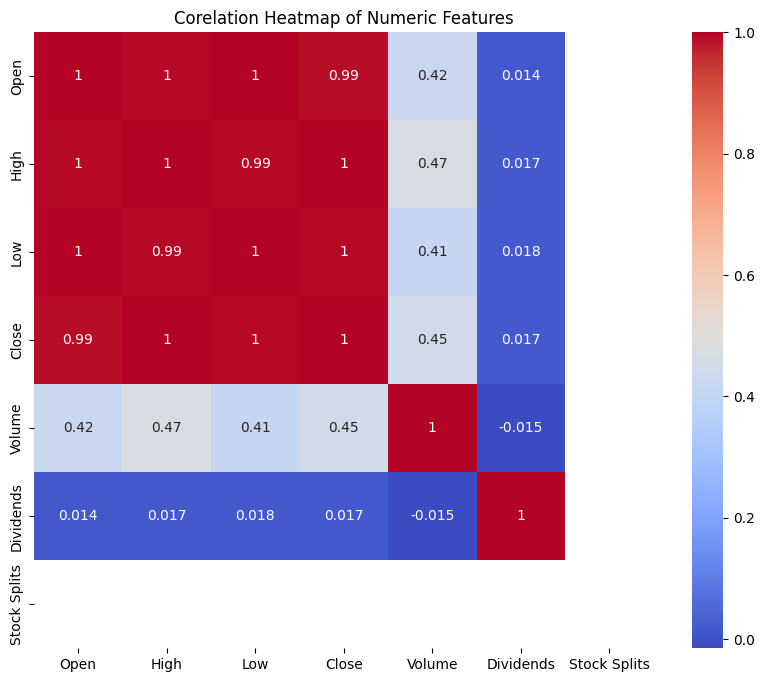

In [40]:
# Membuat Visualisasi korelasi dari data untuk memilih korelasi yang relevan
import seaborn as sns
numeric_df = data.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title ('Corelation Heatmap of Numeric Features')
    plt.show()
else:
    print('Tidak cukup kolom untuk membuat korelasi heatmap')

Insight: Pergerakan harga saham sangat saling berkaitan, dan volume perdagangan memiliki pengaruh moderat terhadap harga. Dividen dan stock splits tidak memengaruhi harga atau volume secara nyata dalam periode ini.

In [41]:
# Menghapus kolom 'Dividends' dan 'Stock Splits'
data.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2022-05-30 00:00:00+07:00,2180.982828,2242.050347,2154.811034,2233.326416,125203400
2022-05-31 00:00:00+07:00,2242.050626,2242.050626,2180.983099,2189.707031,168242000
2022-06-02 00:00:00+07:00,2180.983099,2233.326693,2154.811302,2189.707031,116209300
2022-06-03 00:00:00+07:00,2198.431020,2224.602817,2180.983154,2180.983154,71245700
2022-06-06 00:00:00+07:00,2179.863431,2206.447131,2126.696030,2171.002197,93793800
...,...,...,...,...,...
2025-05-22 00:00:00+07:00,2990.000000,3080.000000,2930.000000,2960.000000,367750100
2025-05-23 00:00:00+07:00,2980.000000,3130.000000,2980.000000,3130.000000,209432100
2025-05-26 00:00:00+07:00,3170.000000,3280.000000,3030.000000,3110.000000,305568000


Insight: Menghapus kolom `Devidence` dan `Stock Split` karena memiliki korelasi yang sagat rendah dan tidak mempengaruhi harga atau volume pada periode ini.

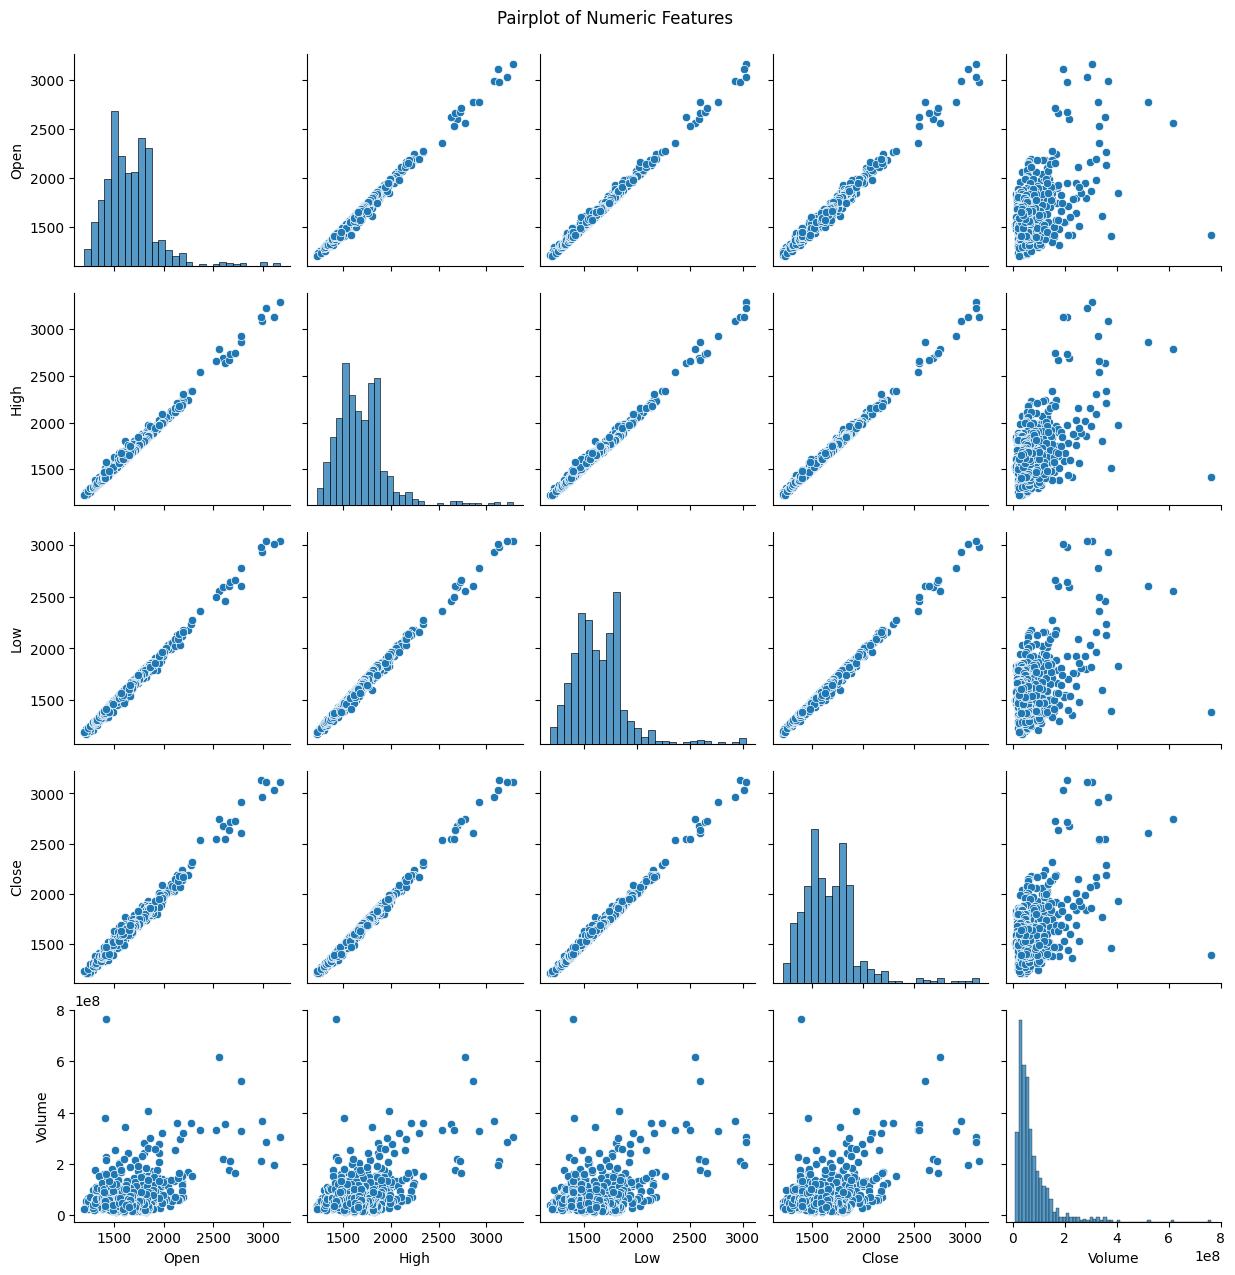

In [42]:
# Visualisasi Hubungan Antar Variabel Numerik
if data.shape[1] >1:
    sns.pairplot(data)
    plt.suptitle('Pairplot of Numeric Features', y=1.02)
    plt.show()


- Proses: Membuat pairplot untuk memvisualisasikan hubungan antar kolom numerik dalam DataFrame `numeric_df` menggunakan library `seaborn`, dengan syarat DataFrame memiliki lebih dari satu kolom
- Alasan: Untuk mengecek distribusi masing masing variabel
- Insight: Pair plot menunjukkan harga (Open, High, Low, Close) memiliki distribusi miring ke kanan dengan puncak 1500-2000 dan lonjakan hingga 3000+, serta korelasi linier sangat kuat (0.99-1.0) antar variabel, mencerminkan pergerakan harian yang konsisten. Volume menunjukkan distribusi sangat miring dengan puncak di bawah 2e8 dan lonjakan hingga 8e8, serta korelasi moderat (0.41-0.47) dengan harga, menunjukkan aktivitas perdagangan meningkat saat harga naik. Ini mengindikasikan volatilitas harga dan hubungan volume-harga yang bisa menjadi fokus analisis pasar lebih lanjut.

# Data Preparation
## Deskripsi
Mempersiapkan data untuk modeling. Tahapan yang dilakukan adalah Pembersihan Data, Penyesuaian Indeks dan Format Tanggal, Pemeriksaan dan Penanganan Tanggal Tidak Valid, Membentuk DataFrame untuk Pelatihan Model Deret Waktu (Time Window), Normalisasi Data, Memisahkan Fitur, Mereshape, dan Membagi Data untuk Pelatihan.

## Fyi
Karena pada tahapan EDA sudah melakukan beberapa tahapan seperti pembersihan data dengan menghapus kolom yang memiliki korelasi yang rendah, pada tahapan ini hanya melakukan persiapan data yang belum dilakukan.


In [43]:
# Penyesuaian Indeks dan Format Tanggal
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

Alasan: Data historis dari yfinance menggunakan kolom Date sebagai indeks sehingga perlu disesuaikan agar memungkinkan operasi berbasis waktu.

In [44]:
# Cek apakah tipe data sudah berubah
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    720 non-null    datetime64[ns, Asia/Jakarta]
 1   Open    720 non-null    float64                     
 2   High    720 non-null    float64                     
 3   Low     720 non-null    float64                     
 4   Close   720 non-null    float64                     
 5   Volume  720 non-null    int64                       
dtypes: datetime64[ns, Asia/Jakarta](1), float64(4), int64(1)
memory usage: 33.9 KB


In [45]:
# Pemeriksaan dan Penanganan Tanggal Tidak Valid
invalid_dates = data['Date'].isnull().sum()
print(f'Number of invalid dates: {invalid_dates}')

if invalid_dates > 0:
    data = data.dropna(subset=['Date'])
    print('Dropped rows with invalid dates')

display(data.head())

Number of invalid dates: 0


,Date,Open,High,Low,Close,Volume
0,2022-05-30 00:00:00+07:00,2180.982828,2242.050347,2154.811034,2233.326416,125203400
1,2022-05-31 00:00:00+07:00,2242.050626,2242.050626,2180.983099,2189.707031,168242000
2,2022-06-02 00:00:00+07:00,2180.983099,2233.326693,2154.811302,2189.707031,116209300
3,2022-06-03 00:00:00+07:00,2198.431020,2224.602817,2180.983154,2180.983154,71245700
4,2022-06-06 00:00:00+07:00,2179.863431,2206.447131,2126.696030,2171.002197,93793800


Memeriksa jumlah tanggal yang tidak valid (`NaT`/`NaN`) dalam kolom `Date`, menghapus baris yang mengandung tanggal tidak valid (jika ada), dan menampilkan lima baris pertama DataFrame untuk memverifikasi struktur data.

In [46]:
# Membentuk DataFrame untuk Pelatihan Model Deret Waktu
def prepare_train_df(data_series, data_input=6):
    X, y = [], []

    for i in range(len(data_series) - data_input):
        X.append(data_series[i:i + data_input].flatten())  # Gunakan flatten/ravel
        y.append(data_series[i + data_input][0])  # Ambil angka scalar

    X_df = pd.DataFrame(X, columns=[f'x{i+1}' for i in range(data_input)])
    y_df = pd.Series(y, name='y')

    train_df = pd.concat([X_df, y_df], axis=1)
    return train_df

Proses: Yang dilakukan adalah Mengubah kolom `Close` dari data saham `ANTM.JK` menjadi format supervised learning untuk pelatihan model deret waktu. Fungsi `prepare_train_df` membuat DataFrame dengan fitur (6 harga penutupan sebelumnya) dan target (harga penutupan berikutnya). Kolom `Close` diubah menjadi array 2D sebagai input untuk fungsi.



In [47]:
# Mengambil data Close
data_series = data['Close'].values.reshape(-1, 1)

Alasan: Kolom Close dipilih karena harga penutupan adalah indikator utama kinerja saham dan sering digunakan untuk prediksi deret waktu.

In [48]:
# Normalisasi dan Pembentukan DataFrame Pelatihan
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_series)

- Proses: Menormalkan kolom `Close` dari data saham `ANTM.JK` ke rentang [0, 1] menggunakan `MinMaxScaler` dan mengubah data yang telah dinormalisasi menjadi DataFrame pelatihan menggunakan fungsi `prepare_train_df`. DataFrame pelatihan berisi 6 harga penutupan sebelumnya sebagai fitur (`x1` hingga `x6`) dan harga penutupan berikutnya sebagai target (`y`).
- Alasan: Normalisasi dengan MinMaxScaler mengubah nilai harga penutupan ke rentang [0, 1] untuk memastikan skala seragam


In [49]:
# Menampilkan train_df memungkinkan pemeriksaan struktur dan isi DataFrame untuk memastikan data siap untuk pelatihan model
train_df = prepare_train_df(data_scaled, data_input=6)
train_df

,x1,x2,x3,x4,x5,x6,y
0,0.532983,0.510264,0.510264,0.505720,0.500522,0.486676,0.486676
1,0.510264,0.510264,0.505720,0.500522,0.486676,0.486676,0.477446
2,0.510264,0.505720,0.500522,0.486676,0.486676,0.477446,0.426678
3,0.505720,0.500522,0.486676,0.486676,0.477446,0.426678,0.412833
4,0.500522,0.486676,0.486676,0.477446,0.426678,0.412833,0.375911
...,...,...,...,...,...,...,...
709,0.697917,0.697917,0.744792,0.786458,0.791667,0.885417,0.911458
710,0.697917,0.744792,0.786458,0.791667,0.885417,0.911458,1.000000
711,0.744792,0.786458,0.791667,0.885417,0.911458,1.000000,0.989583
712,0.786458,0.791667,0.885417,0.911458,1.000000,0.989583,0.947917


### Persiapan Data: Memisahkan Fitur, Mereshape, dan Membagi Data untuk Pelatihan
Memisahkan fitur (`X`) dan target (`y`) dari DataFrame pelatihan (`train_df`), mereshape `X` menjadi format `(samples, timesteps, features)` yang sesuai untuk model deret waktu, dan membagi data menjadi set pelatihan (80%) dan pengujian (20%).


In [50]:
# Memisahkan fitur (X) dan target (y)
X = train_df.drop(columns='y').values
y = train_df['y'].values

Alasan: Kolom fitur (x1 hingga x6) diambil sebagai input model, dan kolom y sebagai target yang akan diprediksi

In [51]:
# Reshape X menjadi (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

Alasan: Karena setiap baris X memiliki 6 fitur (timesteps) dan hanya satu fitur per timestep, X diubah menjadi bentuk (n, 6, 1), di mana n adalah jumlah sampel.

In [52]:
# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Alasan: Data dibagi menjadi set pelatihan (80%) dan pengujian (20%) untuk melatih model dan mengevaluasi performanya.

# Modeling
## Deskripsi
Mendefinisikan model LSTM kompleks untuk memprediksi harga penutupan saham `ANTM.JK`, mengompilasinya dengan optimizer Adam, menambahkan callback EarlyStopping dan ReduceLROnPlateau, lalu melatih model menggunakan data pelatihan dan validasi.


In [53]:
# Pemodelan dan Pelatihan: Membangun dan Melatih Model LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Definisikan model yang lebih kompleks
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(6, 1)))  # Lapisan LSTM pertama dengan lebih banyak unit
model.add(Dropout(0.3))  # Dropout untuk mencegah overfitting
model.add(LSTM(50, return_sequences=False))  # Lapisan LSTM kedua
model.add(Dropout(0.3))  # Dropout kedua
model.add(Dense(25, activation='relu'))  # Lapisan Dense tambahan dengan aktivasi ReLU
model.add(Dense(1))  # Output layer
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,  # Lebih sabar untuk hasil yang lebih baik
    restore_best_weights=True,
    verbose=1
)

# Callback ReduceLROnPlateau untuk mengurangi learning rate jika tidak ada perbaikan
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Kurangi learning rate menjadi 20% dari sebelumnya
    patience=5,  # Tunggu 5 epoch sebelum mengurangi
    min_lr=0.00001,  # Batas minimum learning rate
    verbose=1
)

# Latih model dengan early stopping dan reduce learning rate
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Tambah jumlah epoch
    batch_size=32,  # Ubah batch size untuk stabilitas pelatihan
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0230 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - val_loss: 0.0102 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025 - val_loss: 0.0058 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - val_loss: 0.0067 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 0.0059 - learning_rate: 0.0010
Epoch 10/100
18/18 ━━━━━

### Alasan
- Model Kompleks: Arsitektur dengan dua lapisan LSTM (100 dan 50 unit) dan lapisan Dense (25 unit) dipilih untuk menangkap pola kompleks dalam deret waktu harga saham. return_sequences=True pada lapisan pertama memungkinkan pemrosesan berurutan.
- Dropout: Lapisan Dropout (0.3) digunakan untuk mengurangi overfitting dengan menonaktifkan 30% neuron secara acak selama pelatihan.
- Optimizer dan Loss: Adam dengan learning rate 0.001 dipilih untuk optimasi cepat dan stabil, dan mean_squared_error sesuai untuk regresi prediksi harga.
- EarlyStopping: Digunakan untuk menghentikan pelatihan jika val_loss tidak membaik selama 15 epoch, mencegah overfitting dan memulihkan bobot terbaik.
- ReduceLROnPlateau: Mengurangi learning rate sebesar 20% jika val_loss stagnan selama 5 epoch, dengan batas minimum 0.00001, untuk meningkatkan konvergensi.
- Pelatihan: epochs=100 dan batch_size=32 dipilih untuk memberikan cukup iterasi dan stabilitas, dengan validasi untuk memantau performa.

# Evaluasi Model
Membuat prediksi menggunakan model LSTM yang telah dilatih pada data pelatihan dan pengujian, menghitung Root Mean Squared Error (RMSE) untuk mengevaluasi akurasi, dan menampilkan ringkasan arsitektur model.


In [54]:
# Prediksi dan Pengukuran Performa

# Evaluasi model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Hitung RMSE untuk data train dan test
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Tampilkan ringkasan model
model.summary()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train RMSE: 0.032873920278108607
Test RMSE: 0.06730266103663025


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 6, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,905 (847.29 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 144,604 (564.86 KB)

### Alasan
- Prediksi: Membuat train_predictions dan test_predictions untuk mengevaluasi seberapa baik model mempelajari pola pada data pelatihan dan menggeneralisasi ke data pengujian.
- Hitung RMSE: RMSE dihitung untuk mengukur error prediksi dalam skala normalisasi [0, 1]. Perbandingan train_rmse dan test_rmse membantu mendeteksi overfitting atau underfitting.
- Ringkasan Model: model.summary() ditampilkan untuk memverifikasi arsitektur (jumlah lapisan, unit, parameter) dan memastikan model sesuai dengan desain yang diinginkan.

In [55]:
# Menghitung MAPE pada Skala Asli
from sklearn.metrics import mean_absolute_percentage_error

# Pastikan data dalam skala asli (inverse transform)
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
train_predictions_rescaled = scaler.inverse_transform(train_predictions).flatten()
test_predictions_rescaled = scaler.inverse_transform(test_predictions).flatten()

# Hitung MAPE
train_mape = mean_absolute_percentage_error(y_train_rescaled, train_predictions_rescaled) * 100
test_mape = mean_absolute_percentage_error(y_test_rescaled, test_predictions_rescaled) * 100

print(f"Train MAPE: {train_mape:.3f}%")
print(f"Test MAPE: {test_mape:.3f}%")

Train MAPE: 3.066%
Test MAPE: 4.741%


### Proses
Mengembalikan prediksi dan nilai aktual dari skala normalisasi ke skala asli menggunakan inversi normalisasi, menghitung Mean Absolute Percentage Error (MAPE) untuk data pelatihan dan pengujian, dan menampilkan hasil dalam persen.

### Alasan
- Inversi Normalisasi: Mengembalikan data ke skala asli (harga saham) diperlukan karena MAPE mengukur error relatif berdasarkan nilai aktual, yang lebih bermakna dalam satuan rupiah daripada skala normalisasi [0, 1].
- Hitung MAPE: MAPE dihitung untuk mengevaluasi akurasi prediksi dalam persen, memberikan indikasi intuitif tentang seberapa besar error relatif terhadap harga saham asli. Ini lebih mudah diinterpretasikan dibandingkan RMSE dalam skala normalisasi.
- Perbandingan Train dan Test: Membandingkan train_mape dan test_mape membantu menilai konsistensi model dan mendeteksi potensi overfitting.

# Visualisasi Grafik Harga Actual dan Prediksi

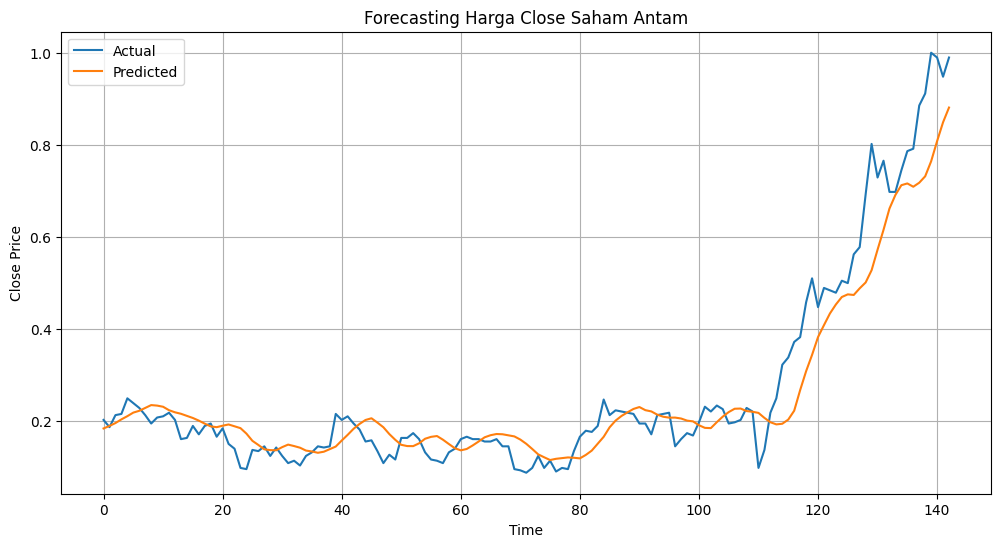

In [56]:
# Cek grafik harga Actual dan Prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title("Forecasting Harga Close Saham Antam")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

Alasan: Untuk melihat bagaimana perbandingan harga Actual dan Prediksi

# Forecasting Untuk 30 hari kedepan
Memprediksi harga penutupan saham `ANTM.JK` untuk 30 hari ke depan menggunakan model LSTM dengan input 6 hari terakhir, mengembalikan prediksi ke skala asli, dan menyusun hasil dalam DataFrame dengan tanggal yang sesuai.


In [57]:
# Forecasting 30 hari ke depan
data_input = 6
last_sequence = data_scaled[-data_input:]  # Ambil 6 hari terakhir
forecast = []
future_dates = pd.date_range(start='2025-05-23', periods=30, freq='D')  # Mulai dari 23 Mei 2025

for _ in range(30):
    # Ubah bentuk yang benar untuk prediksi (jumlah sampel, jumlah timestep, jumlah fitur)
    last_sequence_reshaped = last_sequence.reshape((1, data_input, 1)) # Ubah bentuk untuk prediksi, dengan asumsi 1 fitur

    next_pred = model.predict(last_sequence_reshaped, verbose=0)  # Prediksi
    forecast.append(next_pred[0, 0])  # Simpan prediksi

    # Perbarui urutan untuk iterasi berikutnya
    next_sequence = last_sequence[1:]  # Geser jendela
    next_sequence = np.vstack((next_sequence, np.array([[next_pred[0, 0]]])))  # Append the new prediction as a new step in the sequence
    last_sequence = next_sequence
# Ubah kembali ke nilai asli (Inverse transform)
forecast = np.array(forecast).reshape(-1, 1)

forecast_rescaled = scaler.inverse_transform(forecast)# Ubah kembali harga Close yang diprediksi ke skala asli

# Buat DataFrame untuk hasil
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': forecast_rescaled.flatten() # Flatten the results to a 1D array
})

print(forecast_df)

         Date  Predicted_Close
0  2025-05-23      2961.884521
1  2025-05-24      2980.423340
2  2025-05-25      2983.889648
3  2025-05-26      2958.864258
4  2025-05-27      2934.911621
5  2025-05-28      2920.098145
6  2025-05-29      2891.322021
7  2025-05-30      2881.620605
8  2025-05-31      2865.982178
9  2025-06-01      2847.404053
10 2025-06-02      2830.224609
11 2025-06-03      2814.181885
12 2025-06-04      2797.954102
13 2025-06-05      2783.590332
14 2025-06-06      2768.333496
15 2025-06-07      2753.200928
16 2025-06-08      2738.654785
17 2025-06-09      2724.504883
18 2025-06-10      2710.624268
19 2025-06-11      2697.083740
20 2025-06-12      2683.657959
21 2025-06-13      2670.527100
22 2025-06-14      2657.705322
23 2025-06-15      2645.083984
24 2025-06-16      2632.620850
25 2025-06-17      2620.380371
26 2025-06-18      2608.342041
27 2025-06-19      2596.517578
28 2025-06-20      2584.891846
29 2025-06-21      2573.449219


### Alasan
- Forecasting 30 Hari: Memprediksi harga saham 30 hari ke depan memberikan wawasan untuk perencanaan investasi atau analisis pasar.
- Input 6 Hari Terakhir: Menggunakan 6 hari terakhir dari data historis (data_scaled) sesuai dengan struktur pelatihan model (6 timesteps).
- Loop Prediksi: Pendekatan ini mensimulasikan prediksi berulang dengan menggeser jendela dan menambahkan prediksi terbaru, mencerminkan bagaimana harga masa depan diprediksi berdasarkan prediksi sebelumnya.
- Tanggal Mulai: Tanggal mulai disesuaikan ke 29 Mei 2025 (sehari setelah tanggal saat ini, 28 Mei 2025) untuk prediksi yang relevan.
- Inversi Normalisasi: Mengembalikan prediksi ke skala asli membuat hasil lebih bermakna dalam satuan rupiah.
- DataFrame: Menyusun hasil dalam DataFrame memudahkan analisis, visualisasi, dan penyimpanan.

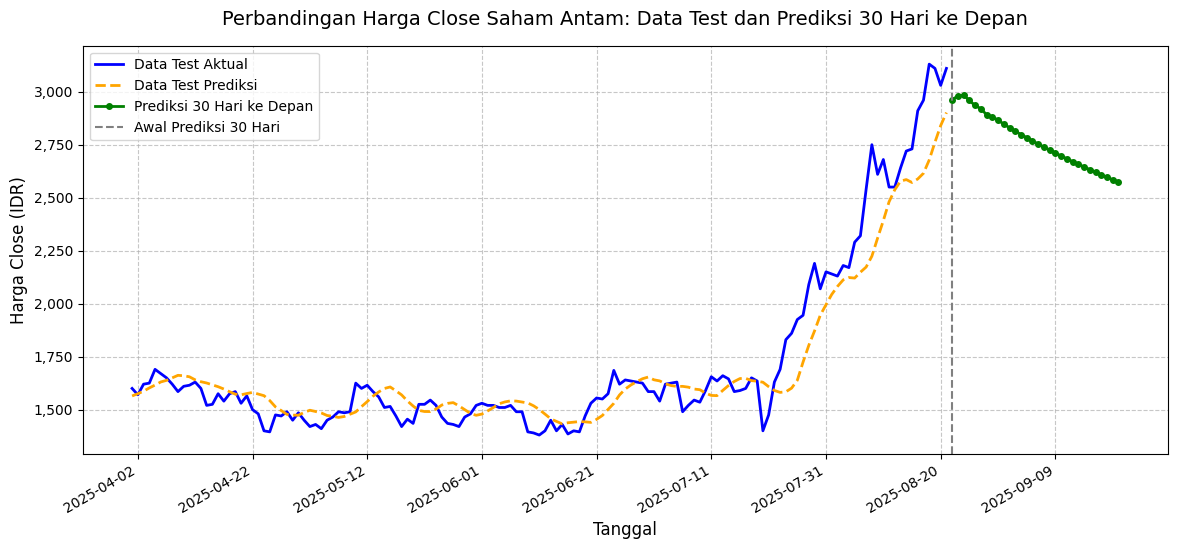

In [58]:
# Membuat visualisasi hasil prediksi

# Pastikan y_test dan test_predictions sudah dalam skala asli
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_rescaled = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()

# Asumsikan y_test adalah bagian dari data historis, kita perlu tanggal untuk sumbu x
test_dates = pd.date_range(start='2025-04-01', periods=len(y_test), freq='D')  # Sesuaikan start date

# Tanggal untuk forecast sudah ada di forecast_df
forecast_dates = forecast_df['Date']
forecast_values = forecast_df['Predicted_Close']

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_rescaled, label='Data Test Aktual', color='blue', linewidth=2)
plt.plot(test_dates, test_predictions_rescaled, label='Data Test Prediksi', color='orange', linestyle='--', linewidth=2)

# Plot forecast 30 hari ke depan, dimulai dari akhir prediksi test
forecast_start_date = test_dates[-1] + pd.Timedelta(days=1)  # Mulai dari hari setelah data test
extended_dates = pd.date_range(start=forecast_start_date, periods=30, freq='D')

# Plot forecast 30 hari ke depan
plt.plot(extended_dates, forecast_values, label='Prediksi 30 Hari ke Depan', color='green', linestyle='-', linewidth=2, marker='o', markersize=4)
plt.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Awal Prediksi 30 Hari')
plt.title("Perbandingan Harga Close Saham Antam: Data Test dan Prediksi 30 Hari ke Depan", fontsize=14, pad=15)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga Close (IDR)", fontsize=12)

# Format sumbu x (tanggal)
plt.gcf().autofmt_xdate()  # Rotasi tanggal agar lebih mudah dibaca
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Batasi jumlah tick pada sumbu x

# Format sumbu y (harga)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format harga dengan pemisah ribuan
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Alasan: Agar mempermudah memprehatikan perkembangan saham dan memberikan dampak langsung bagi investor ritel dengan menyajikan informasi yang mudah dipahami untuk strategi investasi.